<a href="https://colab.research.google.com/github/RuRu0301/Educational-Data-Mining-Projects/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

金門縣政府提供教育相關數據

https://drive.google.com/drive/folders/1ZnEmLN_Gbx074-dv_8m3chn2vvhaeUSK?usp=sharing

金門縣myViewBoard_202404

https://docs.google.com/spreadsheets/d/1IY5Cxdk2Ig6z__GlQD8oo2F0oFKkPdt74HGEmqMvRxQ/edit?usp=sharing

from google.colab import auth：

    這行程式從 Google Colab 模組中導入 auth 物件，用來進行用戶身份驗證。

auth.authenticate_user()：

    此行程式會彈出 Google 登錄對話框，要求用戶登錄他們的 Google 帳戶並授權此筆程式訪問 Google Drive API（包括 Google Sheets）。當用戶完成登錄後，會自動生成授權憑證，讓後續程式可以使用這些權限。

import gspread：

    gspread 是一個 Python 庫，用於通過 Google Sheets API 操作 Google Sheets，提供便捷的方式來讀取、寫入和操作表格數據。

from google.auth import default：

    這行導入了 default() 函數，這個函數會自動返回用戶的 Google API 認證憑證（Credentials）和專案資訊。通常在 Google Colab 環境中，它會自動找到當前使用者的默認憑證。

creds, _ = default()：

    此行程式調用 default() 函數，並將返回的憑證物件存入 creds 變數，這些憑證稍後將被用於進行 Google API 認證。

gc = gspread.authorize(creds)：

    這行將憑證 (creds) 授權給 gspread，這樣 gspread 就能夠通過已授權的 Google API 操作 Google Sheets。最終，gc 是一個 Google Sheets 客戶端物件，你可以用它來訪問並操作 Google Sheets 的內容。

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [4]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IY5Cxdk2Ig6z__GlQD8oo2F0oFKkPdt74HGEmqMvRxQ/edit?usp=sharing')

In [5]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('All-whiteboard-device').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard
0,2024-04-01,15,0,0
1,2024-04-02,8,0,0
2,2024-04-03,7,0,0
3,2024-04-04,0,0,0
4,2024-04-05,0,0,0


In [6]:
type(df['Windows Whiteboard'][0])

str

In [7]:
df['Windows Whiteboard'] = df['Windows Whiteboard'].astype(int)
df['Android Whiteboard'] = df['Android Whiteboard'].astype(int)
df['Mac & IPadOs Whiteboard'] = df['Mac & IPadOs Whiteboard'].astype(int)

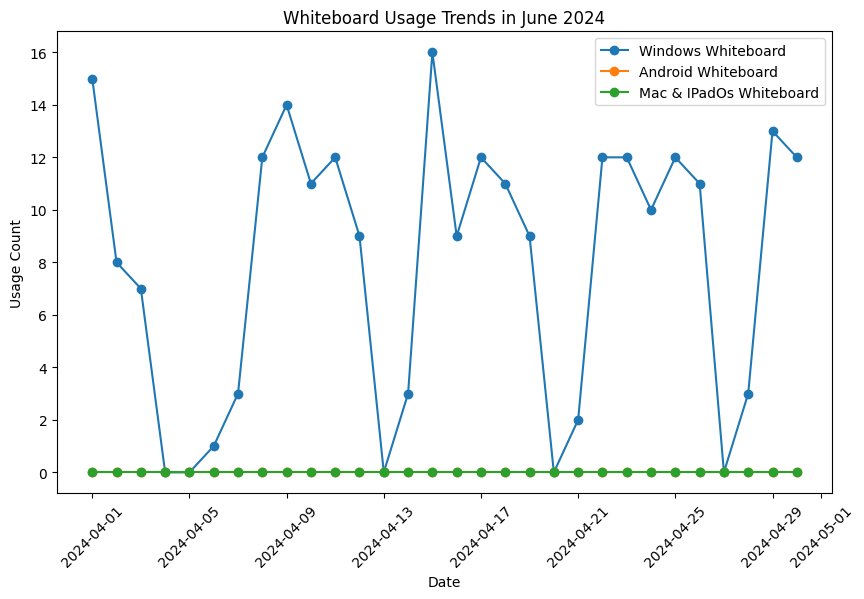

In [8]:
# Retry creating the plot with matplotlib as an alternative for plotly
import matplotlib.pyplot as plt

# Convert the Date column to datetime for better x-axis representation
df['Date'] = pd.to_datetime(df['Date'])

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot each whiteboard's data as a line
plt.plot(df['Date'], df['Windows Whiteboard'], marker='o', label='Windows Whiteboard')
plt.plot(df['Date'], df['Android Whiteboard'], marker='o', label='Android Whiteboard')
plt.plot(df['Date'], df['Mac & IPadOs Whiteboard'], marker='o', label='Mac & IPadOs Whiteboard')

# Add titles and labels
plt.title("Whiteboard Usage Trends in June 2024")
plt.xlabel("Date")
plt.ylabel("Usage Count")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()

用 python 將資料的日期對應出星期幾的新欄位

In [9]:
# Create a new column in the DataFrame that corresponds to the day of the week for each date
df['Day of Week'] = df['Date'].dt.day_name()

df

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard,Day of Week
0,2024-04-01,15,0,0,Monday
1,2024-04-02,8,0,0,Tuesday
2,2024-04-03,7,0,0,Wednesday
3,2024-04-04,0,0,0,Thursday
4,2024-04-05,0,0,0,Friday
5,2024-04-06,1,0,0,Saturday
6,2024-04-07,3,0,0,Sunday
7,2024-04-08,12,0,0,Monday
8,2024-04-09,14,0,0,Tuesday
9,2024-04-10,11,0,0,Wednesday


根據星期的使用數量畫出箱型圖

In [10]:
import plotly.express as px

# Melt the data to make it suitable for the violin plot
df_melted = df.melt(id_vars=["Day of Week"], value_vars=["Windows Whiteboard", "Android Whiteboard", "Mac & IPadOs Whiteboard"],
                    var_name="Platform", value_name="Usage")

df_melted

,Day of Week,Platform,Usage
0,Monday,Windows Whiteboard,15
1,Tuesday,Windows Whiteboard,8
2,Wednesday,Windows Whiteboard,7
3,Thursday,Windows Whiteboard,0
4,Friday,Windows Whiteboard,0
...,...,...,...
85,Friday,Mac & IPadOs Whiteboard,0
86,Saturday,Mac & IPadOs Whiteboard,0
87,Sunday,Mac & IPadOs Whiteboard,0
88,Monday,Mac & IPadOs Whiteboard,0


In [11]:
# Create a violin plot using Plotly
fig = px.box(df_melted, x="Day of Week", y="Usage", color="Platform", points="all")

# Update the layout for better readability
fig.update_layout(
    title="Whiteboard Usage Distribution by Day of the Week",
    xaxis_title="Day of the Week",
    yaxis_title="Usage Count"
)

# Show the plot
fig.show()

In [14]:
max(df_melted['Usage'])

16

圖中的關鍵要素：

    盒子（Box）：
        盒子表示數據的四分位範圍（Interquartile Range, IQR），也就是從第 25 百分位（Q1）到第 75 百分位（Q3）之間的範圍。
        盒子的上緣表示第 75 百分位（即 75% 的數據點低於此值），而下緣則表示第 25 百分位（即 25% 的數據點低於此值）。
        這段範圍內的數據是圖表中的「中位數據」，即中間 50% 的數據。

    中位數（Median）：
        盒子中間的粗線表示數據的中位數（第 50 百分位），代表 50% 的數據低於此數值，50% 的數據高於此數值。
        中位數是數據集中最能代表典型數據的值。

    觸鬚（Whiskers）：
        觸鬚延伸至數據中非極端值的最大範圍，通常顯示從 Q1 到 Q3 之間的 1.5 倍 IQR。
        觸鬚代表數據中的範圍，除了極端值（Outliers）。

    異常值（Outliers）：
        如果有數據點遠離其他數據（位於 Q1 和 Q3 之外的 1.5 倍 IQR），這些數據點會顯示為圖上的「孤立點」。
        這些是異常數據或可能的異常值。

    數據點（Points）：
        顯示圖中的所有具體數據點，這樣可以看到原始數據的具體分佈。
        數據點讓我們能夠清楚了解每一天不同平台上的具體使用次數。

    不同平台的比較：
        每個平台（Windows Whiteboard, Android Whiteboard, Mac & iPadOS Whiteboard）會以不同顏色表示在不同天的使用情況。你可以通過顏色來區分這些平台，並看到它們的數據分佈範圍。

    數據範圍和分佈：
        例如，針對 Windows Whiteboard 的使用情況，某些天數的數據分佈範圍可能比較大（如星期一），這代表這一天的使用量有明顯的高低不一。
        如果某些天的盒子較窄，這代表這一天的數據集中分佈在一個較窄的範圍內，波動不大。

    異常值：
        如果有一些異常值，這些數據會顯示為「孤立點」，表示該天的某些使用量異常突出（可能高於或低於其他數據點）。

    平台之間的使用差異：
        你可以通過觀察圖中的不同平台，發現某些平台（如 Windows Whiteboard）的使用頻率和分佈範圍明顯比其他平台（如 Android Whiteboard）更大。

總結：

這個圖能幫助你比較不同白板平台（Windows、Android、Mac & iPadOS）在不同日期的使用情況。通過這個圖表，你可以了解哪天哪個平台的使用量波動較大，以及是否存在使用上的異常情況。你可以快速看到某些天的數據集中在哪個範圍，並發現不同平台的使用趨勢。

可以看到的內容：
  1.不同種類平台使用量:
    從圖中可以看出學生偏好使用Windows Whiteboard，而Android、Mac & iPadOS Whiteboard則無人使用。
  2.上課時間:
    周一至周五學生使用量明顯高於六日，其中又以星期一最高，推測星期一有較多堂課需要用到白板，可能是需要更多的課堂討論。
  3.放假:
    週四，周五都有一次學生白板使用量為零，推測那兩日放假。
  4.複習:
    週六週日放假，學生卻有少數使用，周日又高於週六，推測部分學生會在假日用白板複習，其中又以上學前一天的星期日較高。
    且週六週日使用次數變異不大，推測都是固定幾位同學每周有規律地使用白板複習。


無法看到的內容：
  1.使用目的:
    資料僅能看每天有多少人用白板，無法知道白板是否真的是上課使用，是否用來學習。
  2.學習時間:
    資料中僅能看出學生使用次數，無法知道使用時間，若學生是在非課堂期間使用，無法知道他實際使用白板學習的時間。
  3.學習成效:
    資料中最多推測教師可能使用討論或圖像方式教學，無法知道過程中學生是否學會。
  4.教學效能:
    資料中最多推測教師可能使用討論或圖像方式教學，無法確定這樣的上課方式是否適合學生。
結論：
雖然白板的使用情況可以知道老師上課使用白板情況，推測老師上課使用的教學方法，以及推測學生假日可能的複習狀況，但對於學生學習的狀況及老師的教學狀況無法得知。